In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('Winter Sports.csv')

In [3]:
df1.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,category
0,34,Pirjo Hannele Aalto (Mattila-),F,32.0,171.0,65.0,Finland,FIN,1994,Winter,Lillehammer,Biathlon,Biathlon Women's 7.5 kilometres Sprint,Winter Sports
1,99,Dagfinn Sverre Aarskog,M,24.0,190.0,98.0,Norway,NOR,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,Winter Sports
2,626,Kazumi Abe,M,24.0,178.0,67.0,Japan-1,JPN,1972,Winter,Sapporo,Bobsleigh,Bobsleigh Men's Two,Winter Sports
3,627,Kazumi Abe,M,24.0,178.0,67.0,Japan-1,JPN,1972,Winter,Sapporo,Bobsleigh,Bobsleigh Men's Four,Winter Sports
4,628,Kazumi Abe,M,28.0,178.0,67.0,Japan-1,JPN,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Two,Winter Sports


In [4]:
df1.drop(columns ='Unnamed: 0',axis =1,inplace = True)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9350 entries, 0 to 9349
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      9350 non-null   object 
 1   Sex       9350 non-null   object 
 2   Age       9350 non-null   float64
 3   Height    9350 non-null   float64
 4   Weight    9350 non-null   float64
 5   Team      9350 non-null   object 
 6   NOC       9350 non-null   object 
 7   Year      9350 non-null   int64  
 8   Season    9350 non-null   object 
 9   City      9350 non-null   object 
 10  Sport     9350 non-null   object 
 11  Event     9350 non-null   object 
 12  category  9350 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 949.7+ KB


In [6]:
df1.corr(numeric_only = True)

,Age,Height,Weight,Year
Age,1.000000,0.120795,0.186655,-0.128823
Height,0.120795,1.000000,0.781033,-0.145387
Weight,0.186655,0.781033,1.000000,-0.083203
Year,-0.128823,-0.145387,-0.083203,1.000000


<Axes: >

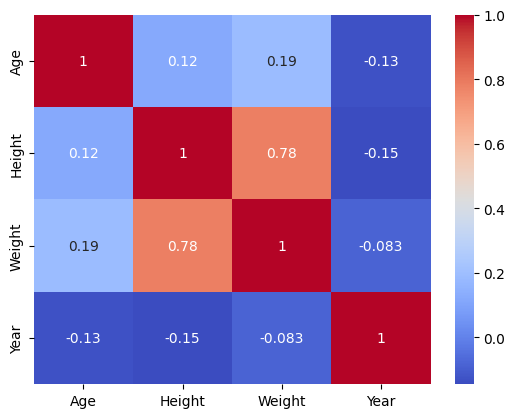

In [7]:
sns.heatmap(df1.corr(numeric_only = True),cmap = 'coolwarm',annot= True)

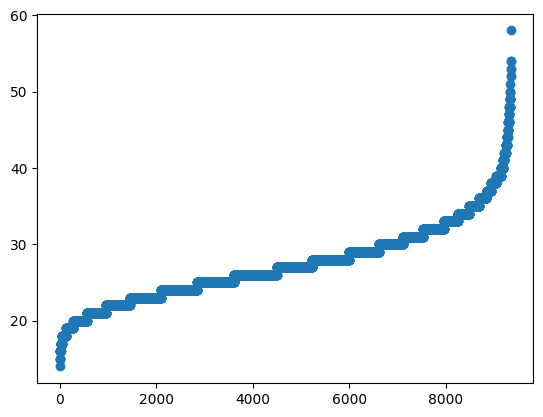

In [8]:
d = df1.sort_values(by = 'Age')
plt.scatter(range(len(d)),'Age',data = d)


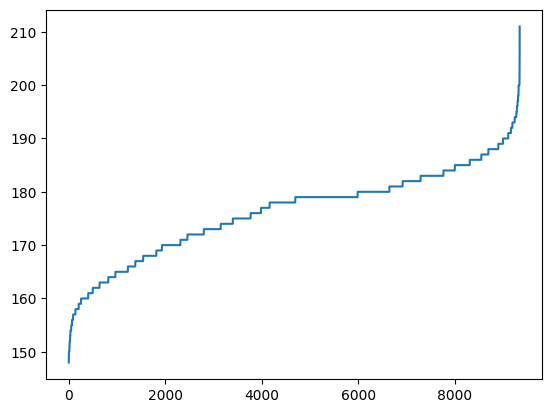

In [9]:
d = df1.sort_values(by = 'Height')
plt.plot(range(len(d)),'Height',data = d)

In [10]:
df1.describe()

,Age,Height,Weight,Year
count,9350.000000,9350.000000,9350.000000,9350.000000
mean,27.422567,176.311765,73.194599,1994.343316
std,5.159178,8.297033,13.267238,19.735674
min,14.000000,148.000000,43.000000,1924.000000
25%,24.000000,171.000000,64.000000,1988.000000
50%,27.000000,178.000000,72.000000,1998.000000
75%,30.000000,182.000000,80.000000,2010.000000
max,58.000000,211.000000,145.000000,2014.000000


# i have check the skewness and correlation,check the oulier in the data.i have see some oulier in the data.so i have remove the oulier in the data

In [19]:
q1 = np.percentile(df1['Age'],25)
q3 = np.percentile(df1['Age'],75)
iqr = q3 - q1
upper_limit_age = q3 + 1.5*iqr
lower_limit_age = q1 - 1.5*iqr
print('upper ',upper_limit_age)
print('lower',lower_limit_age)

upper  39.0
lower 15.0


In [20]:
q1 = np.percentile(df1['Height'],25)
q3 = np.percentile(df1['Height'],75)
iqr = q3 - q1
upper_limit_hg = q3 + 1.5*iqr
lower_limit_hg = q1 - 1.5*iqr
print('upper ',upper_limit_hg)
print('lower',lower_limit_hg)

upper  198.5
lower 154.5


In [21]:
q1 = np.percentile(df1['Weight'],25)
q3 = np.percentile(df1['Weight'],75)
iqr = q3 - q1
upper_limit_wg = q3 + 1.5*iqr
lower_limit_wg = q1 - 1.5*iqr
print('upper ',upper_limit_wg)
print('lower',lower_limit_wg)

upper  104.0
lower 40.0


In [22]:
q1 = np.percentile(df1['Year'],25)
q3 = np.percentile(df1['Year'],75)
iqr = q3 - q1
upper_limit_yr = q3 + 1.5*iqr
lower_limit_yr = q1 - 1.5*iqr
print('upper ',upper_limit_yr)
print('lower',lower_limit_yr)

upper  2043.0
lower 1955.0


In [24]:
# this new data base create.i have remove all outlier in this dataset
df = df1[(df1['Age'] > lower_limit_age) & (df1['Age'] < upper_limit_age) & (df1['Height'] > lower_limit_hg) & (df1['Height'] < upper_limit_hg) & (df1['Year'] > lower_limit_yr) & (df1['Weight'] > lower_limit_wg) & (df1['Weight'] < upper_limit_wg)] 


In [26]:
df.describe()

,Age,Height,Weight,Year
count,8361.000000,8361.000000,8361.000000,8361.000000
mean,26.805765,175.944983,72.428717,1997.769166
std,4.382279,8.138298,12.635280,14.048236
min,16.000000,155.000000,44.000000,1956.000000
25%,24.000000,170.000000,63.000000,1992.000000
50%,26.000000,178.000000,72.000000,2002.000000
75%,30.000000,182.000000,80.000000,2010.000000
max,38.000000,198.000000,103.000000,2014.000000


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12964\3983742443.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], hist=False, label='Age', ax=axes[0, 0],color = 'red')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_12964\3983742443.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



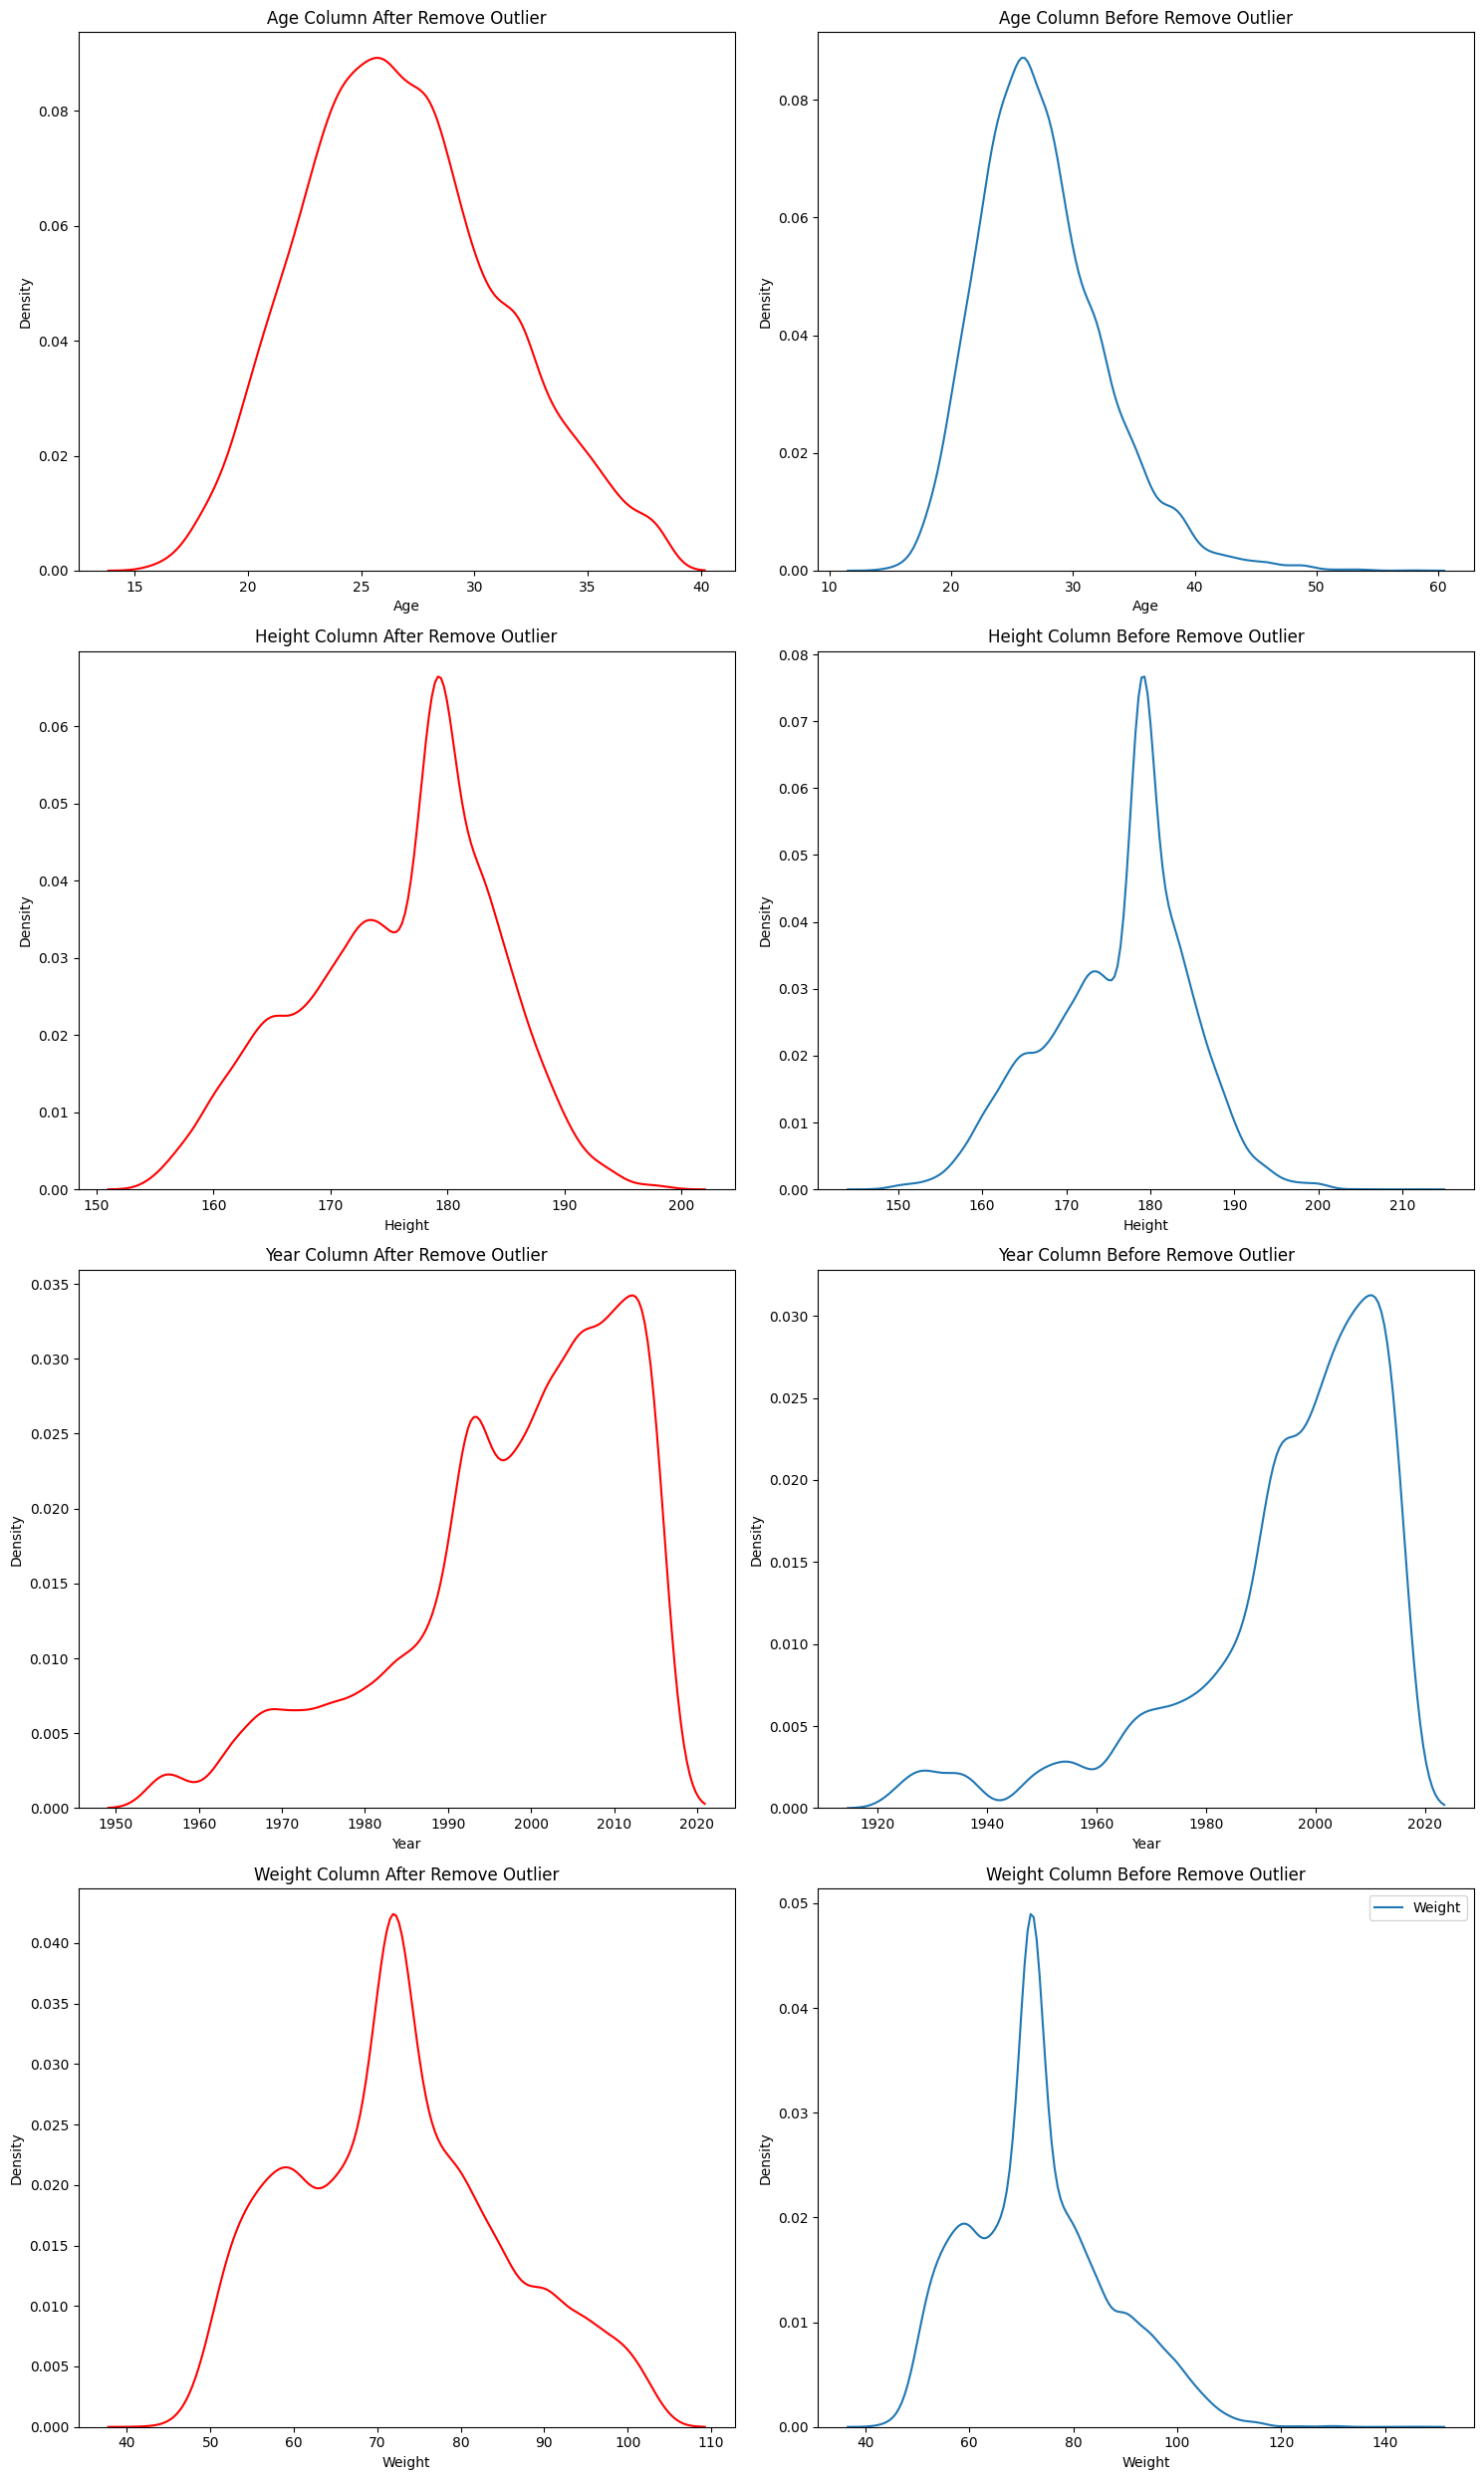

In [38]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
#age plot
sns.distplot(df['Age'], hist=False, label='Age', ax=axes[0, 0],color = 'red')
axes[0, 0].set_title('Age Column After Remove Outlier')

sns.distplot(df1['Age'], hist=False, label='Age', ax=axes[0, 1])
axes[0, 1].set_title('Age Column Before Remove Outlier')



# Plot Height
sns.distplot(df['Height'], hist=False, label='Height', ax=axes[1, 0],color = 'red')
axes[1, 0].set_title('Height Column After Remove Outlier')

sns.distplot(df1['Height'], hist=False, label='Height', ax=axes[1, 1])
axes[1, 1].set_title('Height Column Before Remove Outlier')


#plot Year
sns.distplot(df['Year'], hist=False, label='Year', ax=axes[2, 0],color = 'red')
axes[2, 0].set_title('Year Column After Remove Outlier')

sns.distplot(df1['Year'], hist=False, label='year', ax=axes[2, 1])
axes[2, 1].set_title('Year Column Before Remove Outlier')



# Plot Weight
sns.distplot(df['Weight'], hist=False, label='weight',color = 'red', ax=axes[3, 0])
axes[3, 0].set_title('Weight Column After Remove Outlier')

sns.distplot(df1['Weight'], hist=False, label='Weight', ax=axes[3, 1])
axes[3, 1].set_title('Weight Column Before Remove Outlier')


# Adjust layout
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()


In [37]:
y1 = df['Year'].skew()
h1 = df['Height'].skew()
w1 = df['Weight'].skew()
a1 = df['Age'].skew()
y = df1['Year'].skew()
h = df1['Height'].skew()
w = df1['Weight'].skew()
a = df1['Age'].skew()
print(f'After remove outlier Year skewness:{y1} and Before remove outlier skewness:{y}')
print(f'After remove outlier Height skewness:{h1} and Before remove outlier skewness:{h}')
print(f'After remove outlier Weight skewness:{w1} and Before remove outlier skewness:{w}')
print(f'After remove outlier Age skewness:{a1} and Before remove outlier skewness:{a}')



After remove outlier Year skewness:-0.9390128020642191 and Before remove outlier skewness:-1.5534719975001121
After remove outlier Height skewness:-0.3316742656508628 and Before remove outlier skewness:-0.36500481050441486
After remove outlier Weight skewness:0.29707398008221814 and Before remove outlier skewness:0.49219450062044556
After remove outlier Age skewness:0.308816706343023 and Before remove outlier skewness:0.8650741697497448


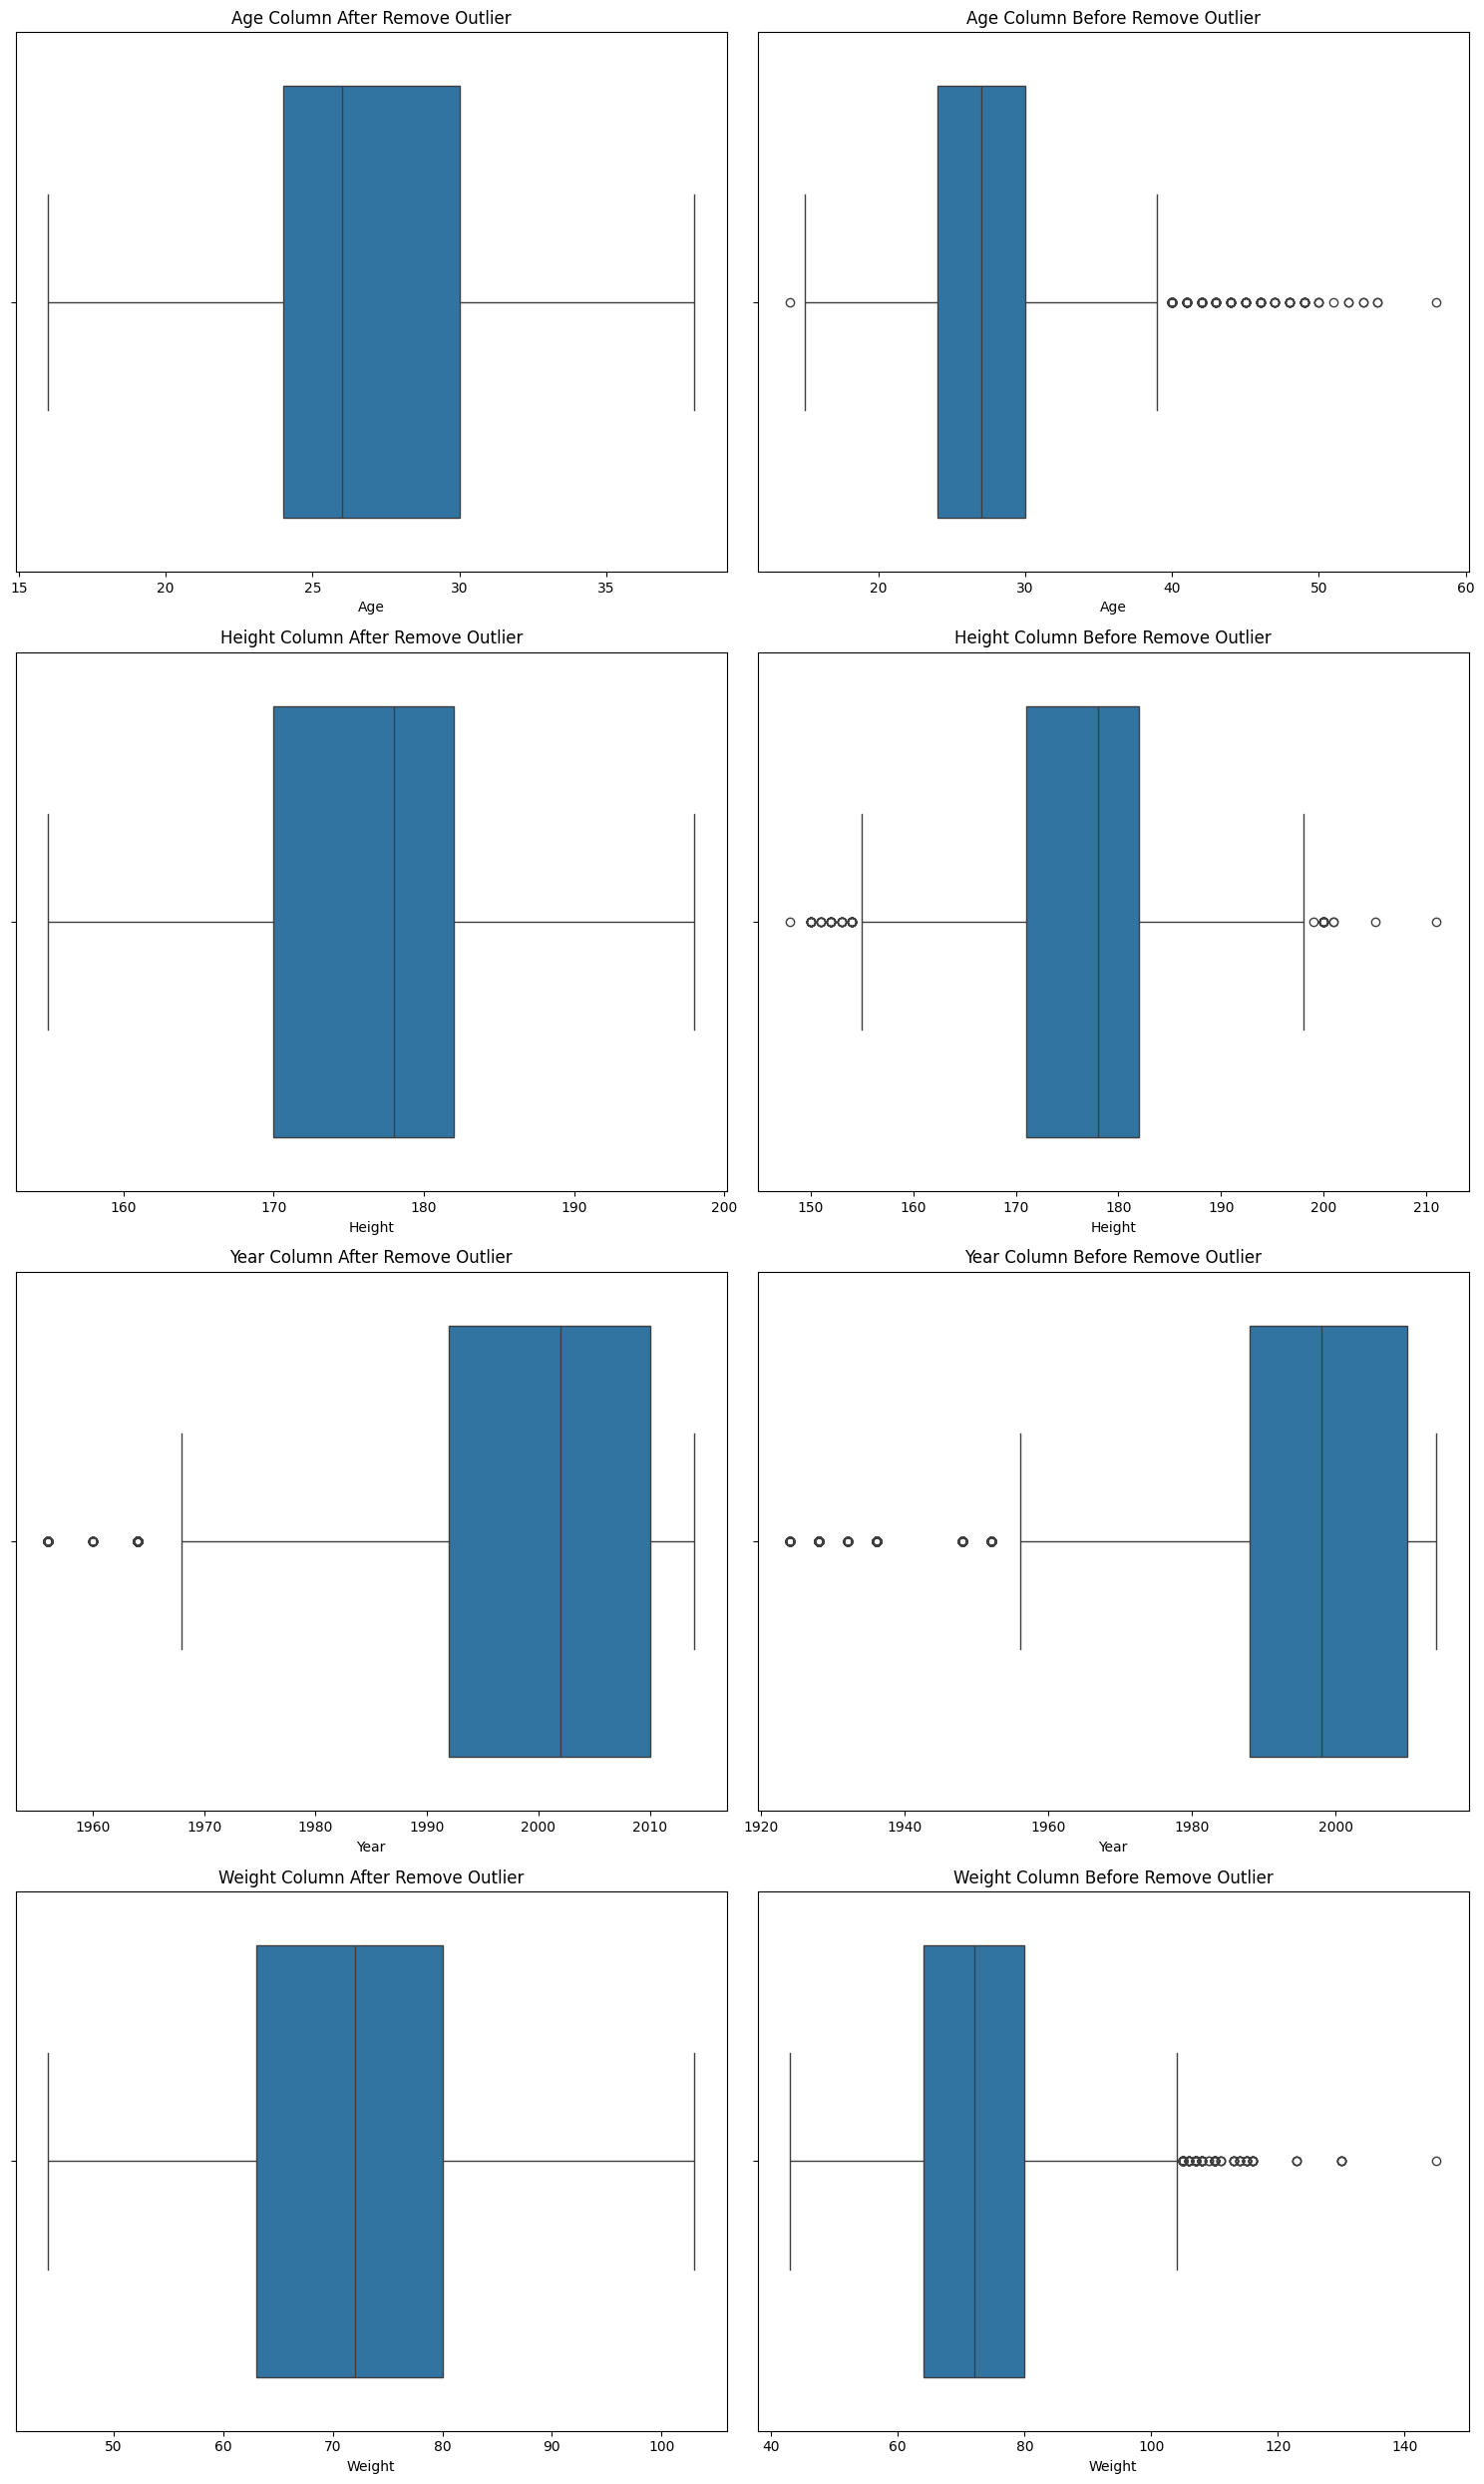

In [44]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
#age plot
sns.boxplot(x = df['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Age Column After Remove Outlier')

sns.boxplot(x = df1['Age'],ax=axes[0, 1])
axes[0, 1].set_title('Age Column Before Remove Outlier')



# Plot Height
sns.boxplot(x = df['Height'], ax=axes[1, 0])
axes[1, 0].set_title('Height Column After Remove Outlier')

sns.boxplot(x = df1['Height'],ax=axes[1, 1])
axes[1, 1].set_title('Height Column Before Remove Outlier')


#plot Year
sns.boxplot(x = df['Year'] ,ax=axes[2, 0])
axes[2, 0].set_title('Year Column After Remove Outlier')

sns.boxplot(x = df1['Year'], ax=axes[2, 1])
axes[2, 1].set_title('Year Column Before Remove Outlier')



# Plot Weight
sns.boxplot(x = df['Weight'], ax=axes[3, 0])
axes[3, 0].set_title('Weight Column After Remove Outlier')

sns.boxplot(x = df1['Weight'], ax=axes[3, 1])
axes[3, 1].set_title('Weight Column Before Remove Outlier')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12964\1638793607.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df['Sex'],palette = list('rgb'))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_12964\1638793607.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.countplot(x = df['Sex'],palette = list('rgb'))


Text(0.5, 1.0, 'Sex Ratio According to Dataset')

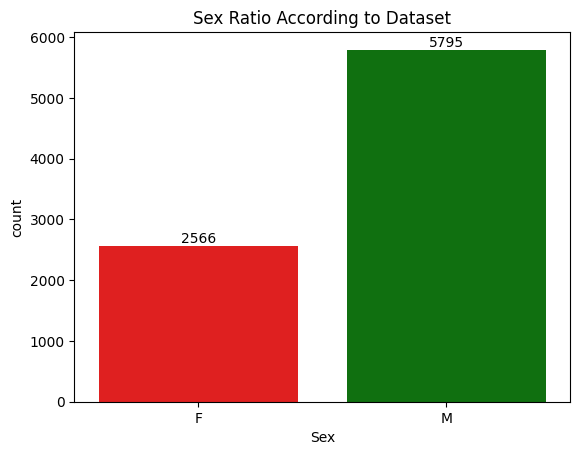

In [47]:
ax = sns.countplot(x = df['Sex'],palette = list('rgb'))
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
plt.title('Sex Ratio According to Dataset')

In [50]:
def age_c(data):
    if 10<= data <=20:
        return '10-20'
    elif 21<= data <=30:
        return '21-30'
    elif 31<= data <=40:
        return '31 - 40'
df['Age_Group'] = df['Age'].apply(age_c)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12964\450057113.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = df['Age'].apply(age_c)


In [51]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,category,Age_Group
0,Pirjo Hannele Aalto (Mattila-),F,32.0,171.0,65.0,Finland,FIN,1994,Winter,Lillehammer,Biathlon,Biathlon Women's 7.5 kilometres Sprint,Winter Sports,31 - 40
1,Dagfinn Sverre Aarskog,M,24.0,190.0,98.0,Norway,NOR,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,Winter Sports,21-30
2,Kazumi Abe,M,24.0,178.0,67.0,Japan-1,JPN,1972,Winter,Sapporo,Bobsleigh,Bobsleigh Men's Two,Winter Sports,21-30
3,Kazumi Abe,M,24.0,178.0,67.0,Japan-1,JPN,1972,Winter,Sapporo,Bobsleigh,Bobsleigh Men's Four,Winter Sports,21-30
4,Kazumi Abe,M,28.0,178.0,67.0,Japan-1,JPN,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Two,Winter Sports,21-30


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12964\2836699870.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ['10-20','21-30','31-40'])


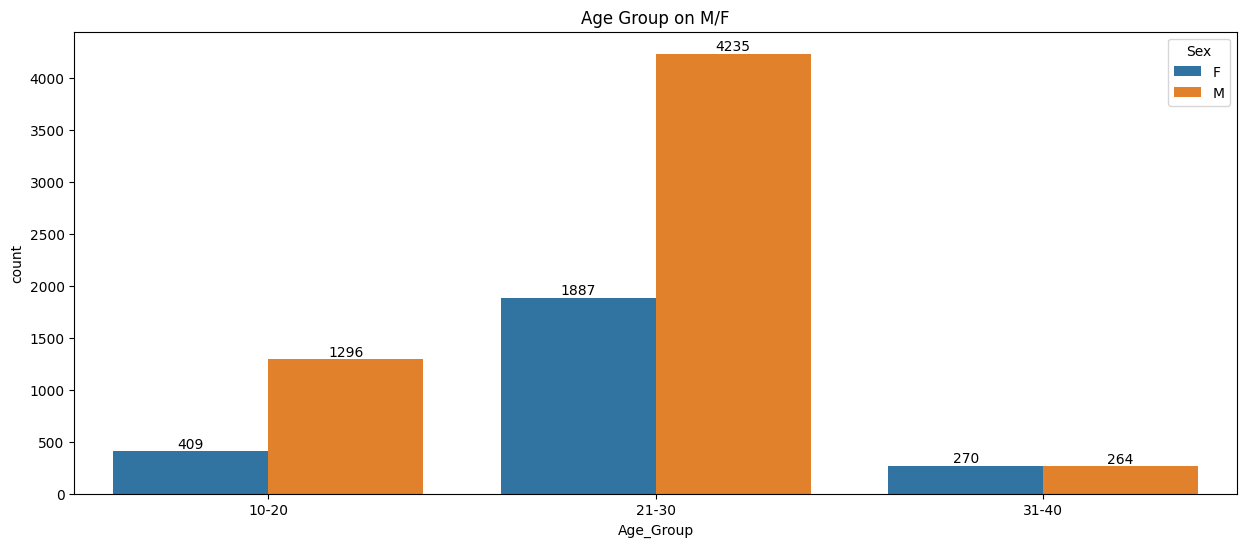

In [54]:
plt.figure(figsize = (15,6))
ax = sns.countplot(x = df['Age_Group'],hue = df['Sex'])
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
ax.set_xticklabels(labels = ['10-20','21-30','31-40'])
plt.title('Age Group on M/F')
plt.show()

In [60]:
l = df['Sport'].unique()

l

array(['Biathlon', 'Bobsleigh', 'Curling', 'Snowboarding'], dtype=object)

In [58]:
age_mean = round(df.groupby(['Sport','Sex'])['Age'].mean()).reset_index()
age_mean

,Sport,Sex,Age
0,Biathlon,F,26.0
1,Biathlon,M,27.0
2,Bobsleigh,F,28.0
3,Bobsleigh,M,28.0
4,Curling,F,28.0
5,Curling,M,30.0
6,Snowboarding,F,25.0
7,Snowboarding,M,25.0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12964\2935547588.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ['Biathlon', 'Bobsleigh', 'Curling', 'Snowboarding'])


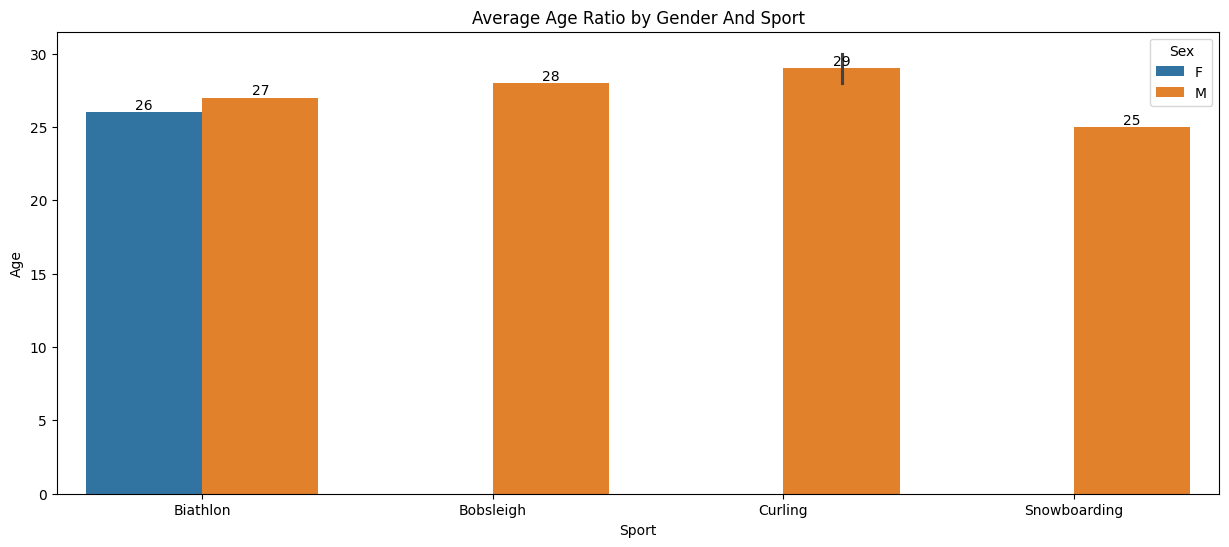

In [64]:
plt.figure(figsize = (15,6))
ax = sns.barplot(x=age_mean['Sport'],y = age_mean['Age'],hue = df['Sex'])
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
ax.set_title('Average Age Ratio by Gender And Sport')
ax.set_xticklabels(labels = ['Biathlon', 'Bobsleigh', 'Curling', 'Snowboarding'])
plt.show()

In [57]:
wg_mean = round(df.groupby(['Sport','Sex'])['Weight'].mean()).reset_index()
wg_mean
hg_mean = round(df.groupby(['Sport','Sex'])['Height'].mean()).reset_index()
hg_mean

,Sport,Sex,Height
0,Biathlon,F,167.0
1,Biathlon,M,179.0
2,Bobsleigh,F,173.0
3,Bobsleigh,M,181.0
4,Curling,F,168.0
5,Curling,M,181.0
6,Snowboarding,F,167.0
7,Snowboarding,M,179.0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12964\2610809136.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ['Biathlon', 'Bobsleigh', 'Curling', 'Snowboarding'])


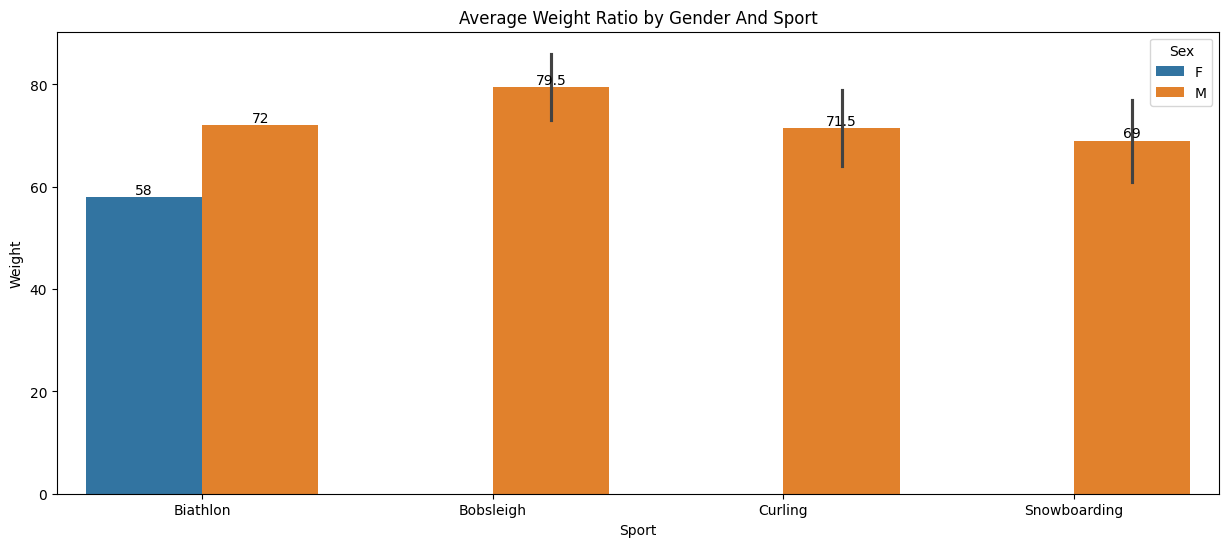

In [63]:
plt.figure(figsize = (15,6))

ax = sns.barplot(x=wg_mean['Sport'],y = wg_mean['Weight'],hue = df['Sex'])
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
ax.set_title('Average Weight Ratio by Gender And Sport')
ax.set_xticklabels(labels = ['Biathlon', 'Bobsleigh', 'Curling', 'Snowboarding'])
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12964\4139055182.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = ['Biathlon', 'Bobsleigh', 'Curling', 'Snowboarding'])


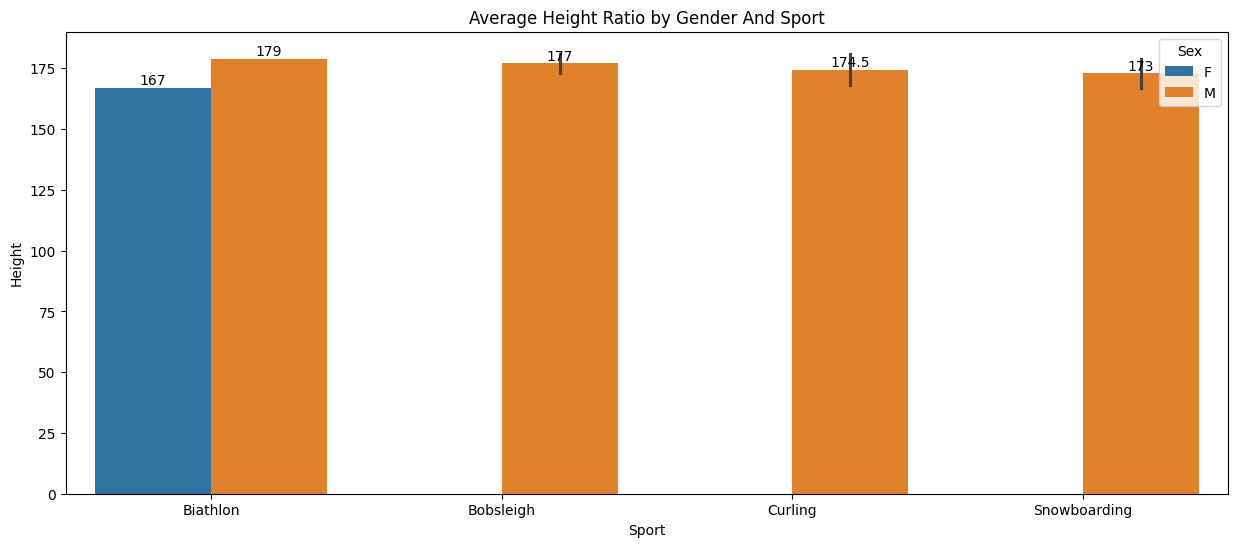

In [65]:
plt.figure(figsize = (15,6))

ax = sns.barplot(x=hg_mean['Sport'],y = hg_mean['Height'],hue = df['Sex'])
for i in range(df.Sex.nunique()):
    ax.bar_label(ax.containers[i]) 
ax.set_title('Average Height Ratio by Gender And Sport')
ax.set_xticklabels(labels = ['Biathlon', 'Bobsleigh', 'Curling', 'Snowboarding'])
plt.show()

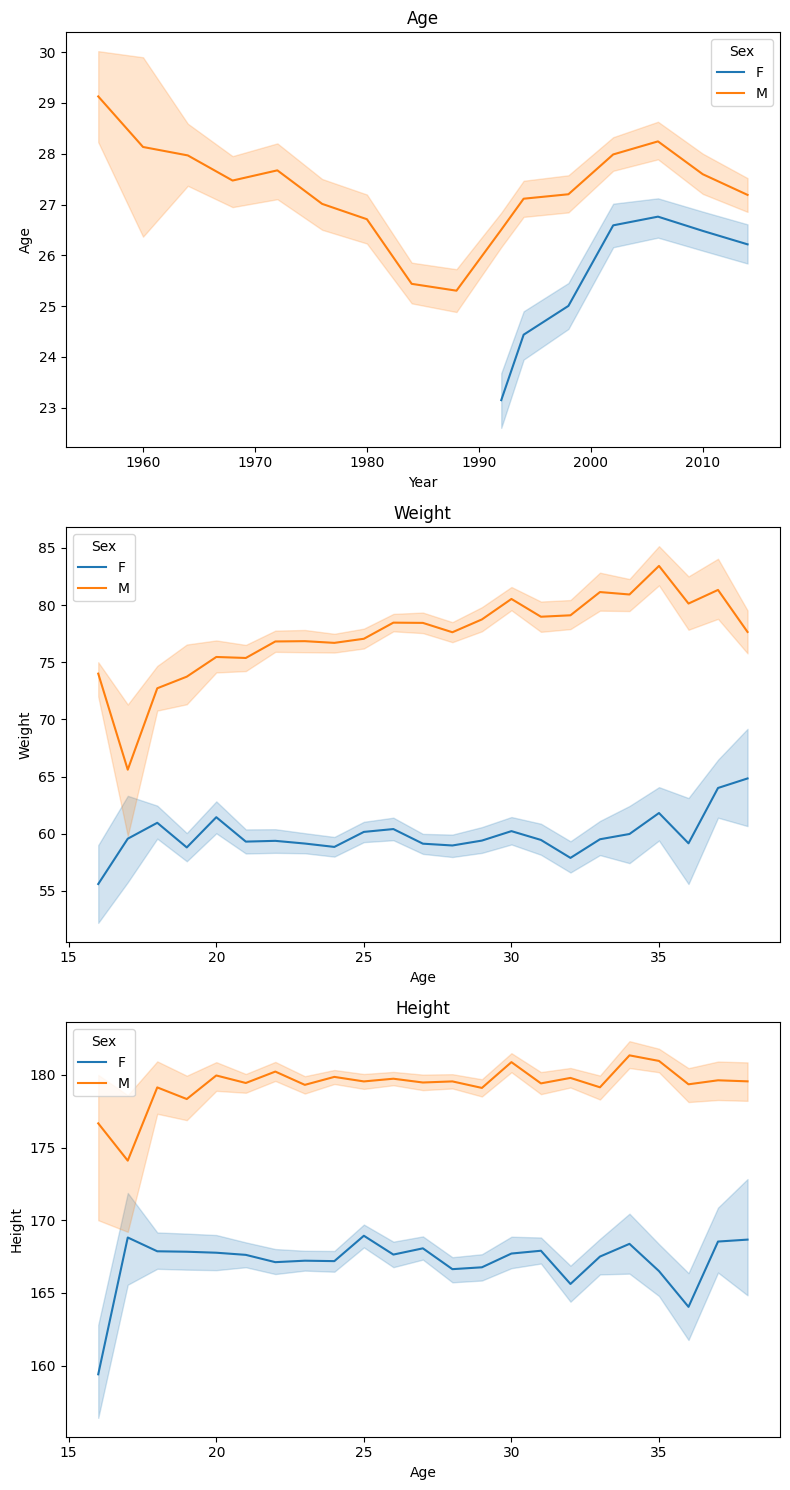

In [68]:
plt.figure(figsize = (8,15))
plt.subplot(3,1,1)
ax = sns.lineplot(x = df['Year'],y = df['Age'],hue = df['Sex'])
ax.set_title('Age')
plt.subplot(3,1,2)
ax = sns.lineplot(y = df['Weight'],x = df['Age'],hue = df['Sex'])
ax.set_title('Weight')
plt.subplot(3,1,3)
ax = sns.lineplot(y = df['Height'],x = df['Age'],hue = df['Sex'])
ax.set_title('Height')
plt.tight_layout()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12964\3789741149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x  = 'Team',y = team_p['Name'], data = team_p,palette = list('rgb'))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_12964\3789741149.py:3: UserWarning: 
The palette list has fewer values (3) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x  = 'Team',y = team_p['Name'], data = team_p,palette = list('rgb'))


Text(0.5, 1.0, 'Top 15 Team most highest player player games')

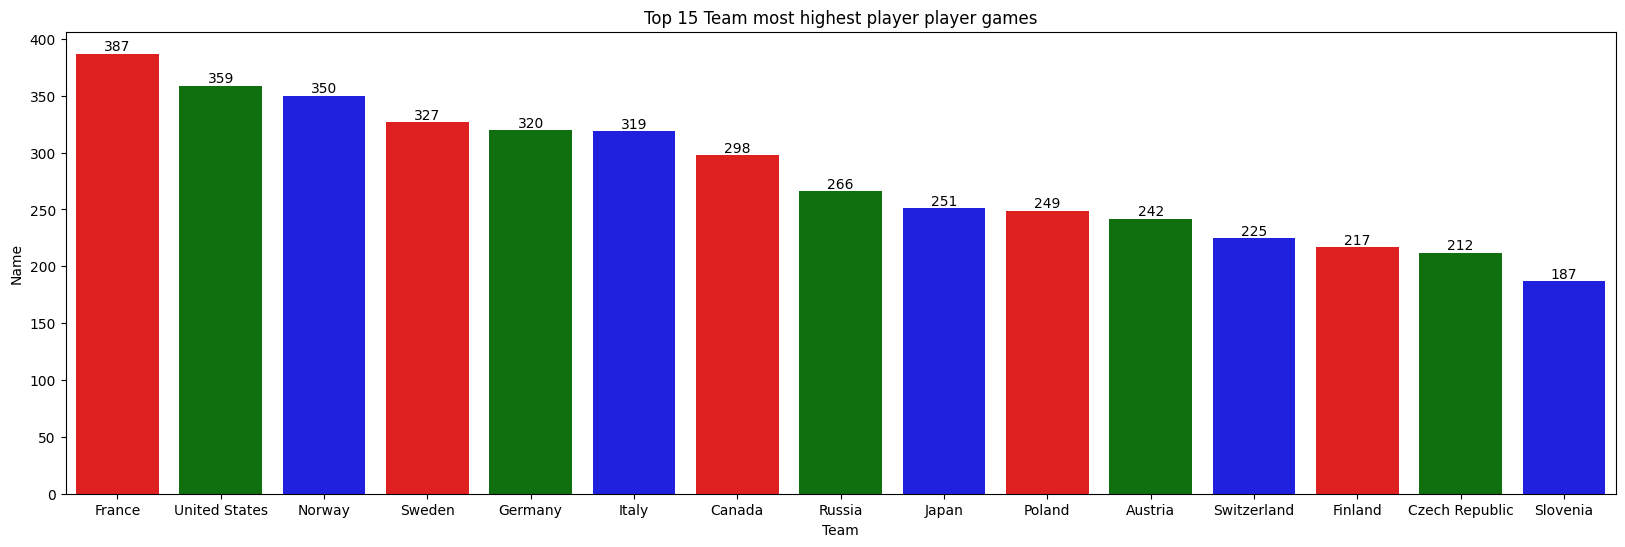

In [69]:
plt.figure(figsize = (20,6))
team_p =   df.groupby(['Team'])['Name'].count().reset_index().sort_values(by = 'Name',ascending = False).head(15)
ax = sns.barplot(x  = 'Team',y = team_p['Name'], data = team_p,palette = list('rgb'))
for i in range(team_p.Name.nunique()):
    ax.bar_label(ax.containers[i])
plt.title('Top 15 Team most highest player player games')


<Axes: xlabel='Year', ylabel='Name'>

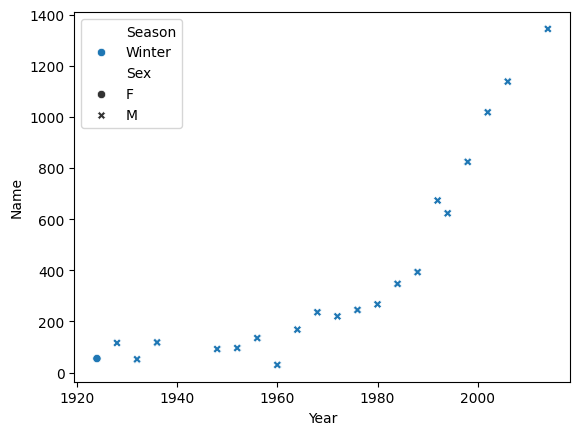

In [72]:
d = df1.groupby(['Year','Season'])['Name'].count().reset_index()
sns.scatterplot(x =d['Year'],y = d['Name'],hue = d['Season'],style = df['Sex'])